# Kaggle Machine Learning and Data Science Survey

郭耀仁

## 載入筆記本需要的套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 定義分析所需要使用的函式

In [2]:
def print_respondents_info(year, df, col_name):
    ttl_respondents = df.shape[0]
    job_title_value_counts = df[col_name].value_counts()
    job_title_percentage = job_title_value_counts / ttl_respondents
    print("{} 年的總答題人數為 {:,}".format(year, ttl_respondents))
    print("{} 年的 Data Analyst 人數為 {:,} 人；比例為 {:.2f}%".format(year, job_title_value_counts['Data Analyst'], job_title_percentage['Data Analyst'] * 100))
    
def get_value_ratios(df, col_name):
    return df[col_name].value_counts() / df[col_name].value_counts().sum()
    
def get_checkbox_ratios(df, col_pattern):
    channel_names = []
    channel_checks = []
    for col_name in df.columns:
        if (col_pattern in col_name) and ('OTHER_TEXT' not in col_name):
            channel_name = df[col_name].value_counts().index
            channel_check = df[col_name].value_counts().values
            if channel_name.size != 0:
                channel_names.append(channel_name[0])
                channel_checks.append(channel_check[0])
    channel_counts = pd.Series(channel_checks, index=channel_names)
    channel_ratios = channel_counts / channel_counts.sum()
    channel_ratios_sorted = channel_ratios.sort_values(ascending=False)
    return channel_ratios_sorted

## 檢視普查問題

In [3]:
questions_2017 = pd.read_csv("https://kaggle-ml-ds-survey.s3-ap-northeast-1.amazonaws.com/kaggle-survey-2017/schema.csv")
questions_2018 = pd.read_csv("https://kaggle-ml-ds-survey.s3-ap-northeast-1.amazonaws.com/kaggle-survey-2018/SurveySchema.csv")
questions_2019 = pd.read_csv("https://kaggle-ml-ds-survey.s3-ap-northeast-1.amazonaws.com/kaggle-survey-2019/questions_only.csv")

In [4]:
questions_2017.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [5]:
questions_2018.head()

,2018 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q47,Q48,Q49,Q5,Q50,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
0,Question:,What is your gender? - Selected Choice,Does your current employer incorporate machine...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,What programming languages do you use on a reg...,What specific programming language do you use ...,...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,Which best describes your undergraduate major?...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Duration (in seconds)
1,# of Respondents:,23860,20670,19518,19199,19117,18971,18864,18828,15223,...,13418,13369,12891,22948,12814,22901,21686,21102,20186,23860
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selecte...,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,If What is the highest level of formal educati...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
questions_2019.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,...,Which categories of ML tools do you use on a r...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following machine learning framew...,Which of the following cloud computing platfor...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...


In [7]:
for col, question in zip(questions_2017['Column'], questions_2017['Question']):
    print("{}: {}".format(col, question))

GenderSelect: Select your gender identity. - Selected Choice
GenderFreeForm: Select your gender identity. - A different identity - Text
Country: Select the country you currently live in.
Age: What's your age?
EmploymentStatus: What's your current employment status?
StudentStatus: Are you currently enrolled as a student at a degree granting school?
LearningDataScience: Are you currently focused on learning data science skills either formally or informally?
KaggleMotivationFreeForm: What's your motivation for being a Kaggle user?
CodeWriter: Do you write code to analyze data in your current job, freelance contracts, or most recent job if retired?
CareerSwitcher: Are you actively looking to switch careers to data science?
CurrentJobTitleSelect: Select the option that's most similar to your current job/professional title (or most recent title if retired). - Selected Choice
CurrentJobTitleFreeForm: Select the option that's most similar to your current job/professional title (or most recent 

In [8]:
for i in range(1, 50):
    col_name = "Q{}".format(i)
    print("Q{}: {}".format(i, questions_2018.loc[0, col_name]))

Q1: What is your gender? - Selected Choice
Q2: What is your age (# years)?
Q3: In which country do you currently reside?
Q4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q5: Which best describes your undergraduate major? - Selected Choice
Q6: Select the title most similar to your current role (or most recent title if retired): - Selected Choice
Q7: In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice
Q8: How many years of experience do you have in your current role?
Q9: What is your current yearly compensation (approximate $USD)?
Q10: Does your current employer incorporate machine learning methods into their business?
Q11: Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice
Q12: What is the primary tool that you use at work or school to analyze data? (include text response) - Selected Choice
Q13: W

In [9]:
for i in range(1, 35):
    col_name = "Q{}".format(i)
    print("Q{}: {}".format(i, questions_2019.loc[0, col_name]))

Q1: What is your age (# years)?
Q2: What is your gender? - Selected Choice
Q3: In which country do you currently reside?
Q4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q5: Select the title most similar to your current role (or most recent title if retired): - Selected Choice
Q6: What is the size of the company where you are employed?
Q7: Approximately how many individuals are responsible for data science workloads at your place of business?
Q8: Does your current employer incorporate machine learning methods into their business?
Q9: Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice
Q10: What is your current yearly compensation (approximate $USD)?
Q11: Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?
Q12: Who/what are your favorite media sources that report on data science t

## 載入普查內容

In [10]:
survey_2017 = pd.read_csv("https://kaggle-ml-ds-survey.s3-ap-northeast-1.amazonaws.com/kaggle-survey-2017/multipleChoiceResponses.csv", encoding='ISO-8859-1', low_memory=False)
survey_2018 = pd.read_csv("https://kaggle-ml-ds-survey.s3-ap-northeast-1.amazonaws.com/kaggle-survey-2018/multipleChoiceResponses.csv", encoding='ISO-8859-1', skiprows=[1], low_memory=False)
survey_2019 = pd.read_csv("https://kaggle-ml-ds-survey.s3-ap-northeast-1.amazonaws.com/kaggle-survey-2019/multiple_choice_responses.csv", encoding='ISO-8859-1', skiprows=[1], low_memory=False)

In [11]:
survey_2017.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
survey_2018.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,434,Male,-1,30-34,Indonesia,Bachelorâs degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,718,Female,-1,30-34,United States of America,Masterâs degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,621,Male,-1,35-39,United States of America,Masterâs degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
4,731,Male,-1,22-24,India,Masterâs degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [13]:
survey_2019.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,510,22-24,Male,-1,France,Masterâs degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,391,40-44,Male,-1,Australia,Masterâs degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
4,392,22-24,Male,-1,India,Bachelorâs degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


## 檢視職稱的人數與比例

In [14]:
print_respondents_info(2017, survey_2017, 'CurrentJobTitleSelect')
print_respondents_info(2018, survey_2018, 'Q6')
print_respondents_info(2019, survey_2019, 'Q5')

2017 年的總答題人數為 16,716
2017 年的 Data Analyst 人數為 1,213 人；比例為 7.26%
2018 年的總答題人數為 23,859
2018 年的 Data Analyst 人數為 1,922 人；比例為 8.06%
2019 年的總答題人數為 19,717
2019 年的 Data Analyst 人數為 1,598 人；比例為 8.10%


In [15]:
survey_2019['Q5'].value_counts()

Data Scientist             4085
Student                    4014
Software Engineer          2705
Other                      1690
Data Analyst               1598
Research Scientist         1470
Not employed                942
Business Analyst            778
Product/Project Manager     723
Data Engineer               624
Statistician                322
DBA/Database Engineer       156
Name: Q5, dtype: int64

## 篩選 Data Analyst 資料集

In [16]:
da_2017 = survey_2017[survey_2017['CurrentJobTitleSelect'] == 'Data Analyst']
da_2018 = survey_2018[survey_2018['Q6'] == 'Data Analyst']
da_2019 = survey_2019[survey_2019['Q5'] == 'Data Analyst']

## Data Analyst 輪廓：性別

In [17]:
get_value_ratios(da_2017, 'GenderSelect')

Male                                                 0.763877
Female                                               0.227009
A different identity                                 0.007457
Non-binary, genderqueer, or gender non-conforming    0.001657
Name: GenderSelect, dtype: float64

In [18]:
get_value_ratios(da_2018, 'Q1')

Male                       0.767950
Female                     0.217482
Prefer not to say          0.012487
Prefer to self-describe    0.002081
Name: Q1, dtype: float64

In [19]:
get_value_ratios(da_2019, 'Q2')

Male                 0.770338
Female               0.217146
Prefer not to say    0.012516
Name: Q2, dtype: float64

## Data Analyst 輪廓：工作國家

In [20]:
get_value_ratios(da_2017, 'Country')[:5]

United States     0.260546
India             0.169562
Other             0.052936
Australia         0.042184
United Kingdom    0.040529
Name: Country, dtype: float64

In [21]:
get_value_ratios(da_2018, 'Q3')[:5]

United States of America    0.216961
India                       0.185224
China                       0.093132
Other                       0.043704
Russia                      0.039542
Name: Q3, dtype: float64

In [22]:
get_value_ratios(da_2019, 'Q3')[:5]

India                                                   0.219024
United States of America                                0.182103
Other                                                   0.069462
Brazil                                                  0.039424
United Kingdom of Great Britain and Northern Ireland    0.028786
Name: Q3, dtype: float64

## Data Analyst 經驗：學習管道

In [23]:
get_value_ratios(da_2017, 'LearningPlatformSelect')[:10]

YouTube Videos                              0.018226
Online courses                              0.018226
Stack Overflow Q&A                          0.017011
Kaggle                                      0.017011
Online courses,YouTube Videos               0.009721
Personal Projects                           0.008505
Kaggle,YouTube Videos                       0.008505
Blogs                                       0.007290
Textbook                                    0.007290
Kaggle,Stack Overflow Q&A,YouTube Videos    0.007290
Name: LearningPlatformSelect, dtype: float64

In [24]:
get_checkbox_ratios(da_2018, 'Q38')[:5]

Kaggle forums        0.152622
Medium Blog Posts    0.123596
r/machinelearning    0.089888
KDnuggets Blog       0.083958
Twitter              0.083333
dtype: float64

In [25]:
get_checkbox_ratios(da_2018, 'Q36')[:5]

Coursera        0.210618
DataCamp        0.166522
Udemy           0.125036
Kaggle Learn    0.112272
edX             0.103278
dtype: float64

In [26]:
get_checkbox_ratios(da_2019, 'Q12')[:5]

Kaggle (forums, blog, social media, etc)                                 0.225299
Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)    0.196607
YouTube (Cloud AI Adventures, Siraj Raval, etc)                          0.149950
Course Forums (forums.fast.ai, etc)                                      0.068363
Reddit (r/machinelearning, r/datascience, etc)                           0.066617
dtype: float64

In [27]:
get_checkbox_ratios(da_2019, 'Q13')[:5]

Coursera                                                 0.189483
DataCamp                                                 0.134254
Udemy                                                    0.131610
Kaggle Courses (i.e. Kaggle Learn)                       0.124853
University Courses (resulting in a university degree)    0.094007
dtype: float64

## Data Analyst 技能：工作內容

In [28]:
get_value_ratios(da_2017, 'JobFunctionSelect')

Analyze and understand data to influence product or business decisions                                                0.711387
Build and/or run the data infrastructure that your business uses for storing, analyzing, and operationalizing data    0.110485
Build and/or run a machine learning service that operationally improves your product or workflows                     0.082300
Build prototypes to explore applying machine learning to new areas                                                    0.052988
Other                                                                                                                 0.030440
Research that advances the state of the art of machine learning                                                       0.012401
Name: JobFunctionSelect, dtype: float64

In [29]:
get_checkbox_ratios(da_2018, 'Q11')

Analyze and understand data to influence product or business decisions                                              0.414894
Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data    0.196647
Build prototypes to explore applying machine learning to new areas                                                  0.137331
Build and/or run a machine learning service that operationally improves my product or workflows                     0.116054
Do research that advances the state of the art of machine learning                                                  0.081560
None of these activities are an important part of my role at work                                                   0.031270
Other                                                                                                               0.022244
dtype: float64

In [30]:
get_checkbox_ratios(da_2019, 'Q9')

Analyze and understand data to influence product or business decisions                                              0.376728
Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data    0.188141
Build prototypes to explore applying machine learning to new areas                                                  0.157379
Experimentation and iteration to improve existing ML models                                                         0.100758
Build and/or run a machine learning service that operationally improves my product or workflows                     0.100312
Do research that advances the state of the art of machine learning                                                  0.054837
Other                                                                                                               0.011592
None of these activities are an important part of my role at work                                                   0.010254


## Data Analyst 技能：工具

In [31]:
get_value_ratios(da_2018, 'Q12_MULTIPLE_CHOICE')

Local or hosted development environments (RStudio, JupyterLab, etc.)    0.404385
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       0.198538
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    0.152862
Advanced statistical software (SPSS, SAS, etc.)                         0.137637
Other                                                                   0.063946
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                0.042631
Name: Q12_MULTIPLE_CHOICE, dtype: float64

In [32]:
get_value_ratios(da_2019, 'Q14')

Local development environments (RStudio, JupyterLab, etc.)              0.427692
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       0.199231
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    0.156154
Advanced statistical software (SPSS, SAS, etc.)                         0.106154
Other                                                                   0.068462
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                0.042308
Name: Q14, dtype: float64

## Data Analyst 技能：整合開發環境

In [33]:
get_checkbox_ratios(da_2018, 'Q13')[:5]

Jupyter/IPython    0.187381
RStudio            0.173207
Notepad++          0.120138
PyCharm            0.082627
Spyder             0.080380
dtype: float64

In [34]:
get_checkbox_ratios(da_2019, 'Q16')[:5]

Jupyter (JupyterLab, Jupyter Notebooks, etc)     0.268512
 RStudio                                         0.177452
  Notepad++                                      0.098732
  Spyder                                         0.093062
 Visual Studio / Visual Studio Code              0.090727
dtype: float64

## Data Analyst 技能：主要使用的程式語言

In [35]:
get_checkbox_ratios(da_2018, 'Q16')[:10]

Python                   0.266934
SQL                      0.227273
R                        0.188057
Visual Basic/VBA         0.042558
SAS/STATA                0.041667
Java                     0.038324
C/C++                    0.037210
Javascript/Typescript    0.035873
Bash                     0.029635
MATLAB                   0.029635
dtype: float64

In [36]:
get_checkbox_ratios(da_2019, 'Q18')[:10]

Python        0.339792
SQL           0.275433
R             0.191349
Javascript    0.035640
Bash          0.030104
MATLAB        0.027682
Other         0.026990
Java          0.025952
C++           0.020415
C             0.019377
dtype: float64

## Data Analyst 技能：推薦的程式語言

In [37]:
get_value_ratios(da_2018, 'Q18')[:10]

Python    0.621875
R         0.208750
SQL       0.121250
C++       0.009375
Java      0.007500
MATLAB    0.006875
SAS       0.006250
Other     0.005000
VBA       0.003750
None      0.003750
Name: Q18, dtype: float64

In [38]:
get_value_ratios(da_2019, 'Q19')[:10]

Python        0.676885
SQL           0.144988
R             0.131732
C++           0.011599
MATLAB        0.008285
None          0.007457
Other         0.006628
C             0.004143
Java          0.003314
Javascript    0.002486
Name: Q19, dtype: float64

## Data Analyst 技能：視覺化套件

In [39]:
get_checkbox_ratios(da_2018, 'Q21')[:10]

Matplotlib    0.232951
ggplot2       0.216780
Seaborn       0.151394
Plotly        0.134286
Shiny         0.077806
D3            0.038200
None          0.031638
Bokeh         0.030935
Lattice       0.026014
Leaflet       0.025545
dtype: float64

In [40]:
get_checkbox_ratios(da_2019, 'Q20')[:10]

 Matplotlib                  0.288897
 Seaborn                     0.200538
 Ggplot / ggplot2            0.175567
 Plotly / Plotly Express     0.109105
 Shiny                       0.058010
None                         0.050327
 Bokeh                       0.029197
 D3.js                       0.026124
Other                        0.021129
 Geoplotlib                  0.020745
dtype: float64

## Data Analyst 技能：機器學習套件

In [41]:
get_checkbox_ratios(da_2018, 'Q19')[:10]

Scikit-Learn    0.198007
randomForest    0.141681
TensorFlow      0.119151
Xgboost         0.100737
Keras           0.096404
None            0.071274
Caret           0.063258
PyTorch         0.035095
lightgbm        0.033795
H20             0.026863
dtype: float64

In [42]:
get_checkbox_ratios(da_2019, 'Q28')[:10]

  Scikit-learn     0.242898
 RandomForest      0.147727
 Xgboost           0.111506
 Keras             0.106179
  TensorFlow       0.106179
None               0.087358
 PyTorch           0.063210
 LightGBM          0.051136
 Caret             0.043324
 Spark MLib        0.019886
dtype: float64

## Data Analyst 技能：關聯式資料庫

In [43]:
get_checkbox_ratios(da_2018, 'Q29')[:10]

MySQL                              0.222786
Microsoft SQL Server               0.143911
PostgresSQL                        0.126384
SQLite                             0.112085
Oracle Database                    0.107934
Microsoft Access                   0.065037
None                               0.032288
AWS Relational Database Service    0.029982
Google Cloud SQL                   0.028137
Other                              0.022601
dtype: float64

In [44]:
get_checkbox_ratios(da_2019, 'Q34')[:10]

MySQL                              0.251493
Microsoft SQL Server               0.172388
PostgresSQL                        0.126866
Oracle Database                    0.105224
SQLite                             0.094030
None                               0.062687
Microsoft Access                   0.061940
Google Cloud SQL                   0.035075
Azure SQL Database                 0.031343
AWS Relational Database Service    0.024627
dtype: float64

## （Optional）以資料視覺化探索 Data Analyst 的輪廓與經驗

- 年齡
- 寫程式資歷
- 機器學習資歷

## Data Analyst 輪廓：年齡

In [45]:
def plot_age_histogram(df, col_name):
    fig = plt.figure(figsize=(10, 4))
    ax = plt.axes()
    is_not_nan = df[col_name].notna()
    x = df[col_name].values[is_not_nan]
    ax.hist(x, bins=50)
    plt.show()

def plot_age_bar(df, col_name):
    fig = plt.figure(figsize=(10, 4))
    ax = plt.axes()
    x = df[col_name].value_counts().sort_index().index
    y = df[col_name].value_counts().sort_index().values
    ax.bar(x, y)
    plt.show()

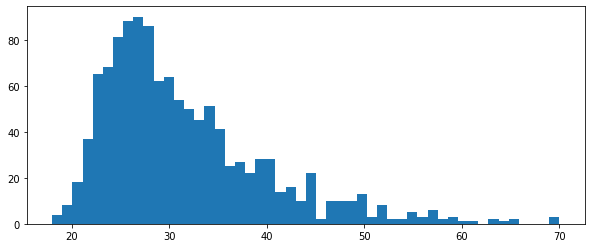

In [46]:
plot_age_histogram(da_2017, 'Age')

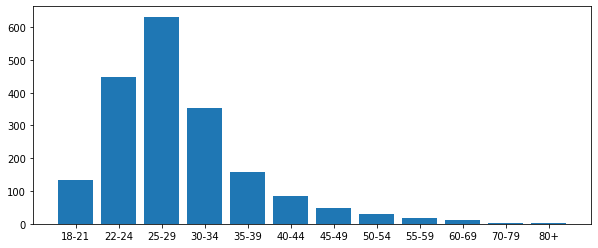

In [47]:
plot_age_bar(da_2018, 'Q2')

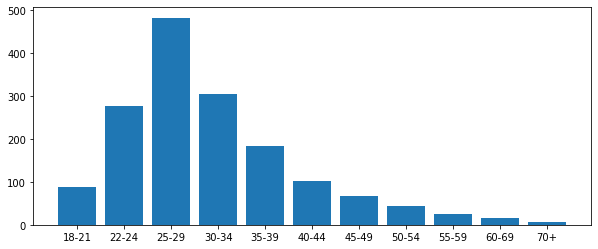

In [48]:
plot_age_bar(da_2019, 'Q1')

## Data Analyst 經驗：寫程式資歷

In [49]:
def plot_experience_bar(df, col_name):
    fig = plt.figure(figsize=(10, 4))
    ax = plt.axes()
    x = df[col_name].value_counts().sort_index().index
    y = df[col_name].value_counts().sort_index().values
    df = pd.DataFrame()
    df['year'] = x
    df['respondents'] = y
    sort_order = df['year'].str.split('-', expand=True)
    sort_order = sort_order[0].str.split(expand=True)[0]
    df['sort'] = sort_order.astype(int)
    x = df.sort_values('sort')['year'].values
    y = df.sort_values('sort')['respondents'].values
    ax.bar(x, y)
    plt.show()

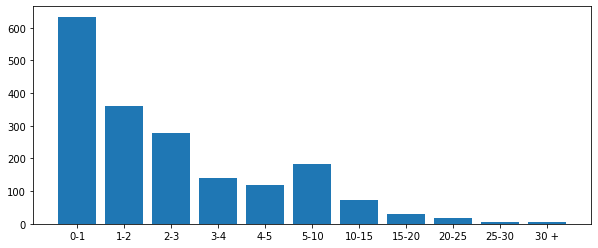

In [50]:
plot_experience_bar(da_2018, 'Q8')

In [51]:
def plot_experience_bar(df, col_name):
    fig = plt.figure(figsize=(14, 4))
    ax = plt.axes()
    x = df[col_name].value_counts().sort_index().index
    y = df[col_name].value_counts().sort_index().values
    df = pd.DataFrame()
    df['year'] = x
    df['respondents'] = y
    df['sort'] = [2, 5, 6, 3, 4, 1, 0]
    x = df.sort_values('sort')['year'].values
    y = df.sort_values('sort')['respondents'].values
    ax.bar(x, y)
    plt.show()

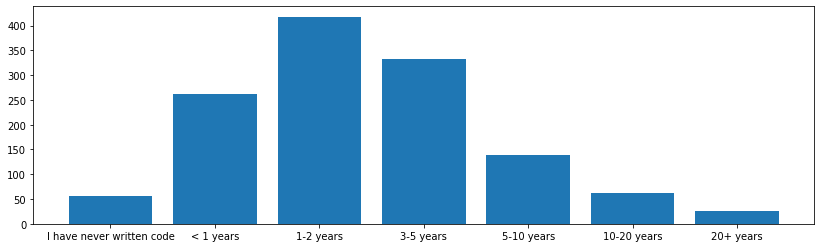

In [52]:
plot_experience_bar(da_2019, 'Q15')

## Data Analyst 經驗：機器學習資歷

In [53]:
def plot_experience_bar(df, col_name):
    fig = plt.figure(figsize=(10, 4))
    ax = plt.axes()
    x = df[col_name].value_counts().sort_index().index
    y = df[col_name].value_counts().sort_index().values
    df = pd.DataFrame()
    df['year'] = x
    df['respondents'] = y
    df['sort'] = [3, 8, 4, 9, 5, 6, 7, 2, 0, 1]
    x = df.sort_values('sort', ascending=False)['year'].values
    y = df.sort_values('sort', ascending=False)['respondents'].values
    ax.barh(x, y)
    plt.show()

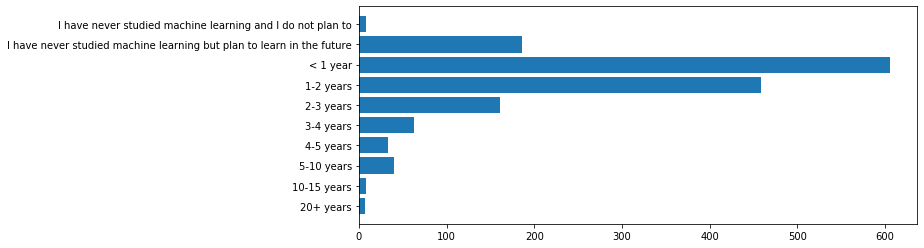

In [54]:
plot_experience_bar(da_2018, 'Q25')

In [55]:
def plot_experience_bar(df, col_name):
    fig = plt.figure(figsize=(10, 4))
    ax = plt.axes()
    x = df[col_name].value_counts().sort_index().index
    y = df[col_name].value_counts().sort_index().values
    df = pd.DataFrame()
    df['year'] = x
    df['respondents'] = y
    df['sort'] = [1, 6, 2, 7, 3, 4, 5, 0]
    x = df.sort_values('sort')['year'].values
    y = df.sort_values('sort')['respondents'].values
    ax.bar(x, y)
    plt.show()

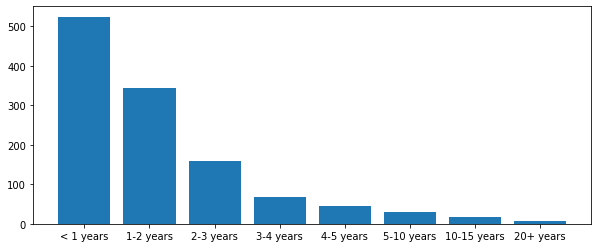

In [56]:
plot_experience_bar(da_2019, 'Q23')